# Data Visualization with Python Studio

At this point, you should already have connected with the rest of your group to divide up who is going to do what. Use this notebook to create your visualizations.

Below we set up the dataframe with the Goodreads dataset for you. If you run this cell, you may get an error that some lines were skipped. Do not worry about that! For this studio, we want to focus on creating an effective

In [1]:
# Here is the setup of the dataframe. Feel free to use .info() or .head() to get a better understanding of what is inside the dataframe!

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

df = pd.read_csv("books.csv", error_bad_lines=False)

years = []

for y in df['publication_date']:
    date = y.split("/")
    years.append(date[2])

df["year"] = years


C:\Users\Dayra\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [2]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,2004


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
 12  year                11123 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


In [4]:
#pd.value_counts(df['publication_date'])

In [5]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
year                   object
dtype: object

In [6]:
#group by year
bk_by = df.groupby('year')['title'].count()
bk_by.describe()

count      87.000000
mean      127.850575
std       294.501808
min         1.000000
25%         3.000000
50%        12.000000
75%        72.500000
max      1700.000000
Name: title, dtype: float64

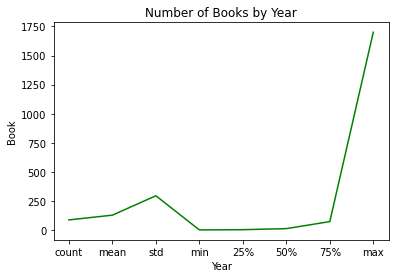

In [13]:
# Single line chart

fig1 = bk_by.plot(kind = 'line', color = 'g')
plt.title('Number of Books by Year',color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Book',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('linechart_single.png')

plt.show()


In [8]:
#group by year
bk_by = df.groupby('year')['title'].count().describe()
bk_by

count      87.000000
mean      127.850575
std       294.501808
min         1.000000
25%         3.000000
50%        12.000000
75%        72.500000
max      1700.000000
Name: title, dtype: float64

In [9]:
#group by publisher
bk_bp = df.groupby('publisher')['title'].count()
bk_bp

publisher
10/18                             2
1st Book Library                  1
1st World Library                 1
A & C Black (Childrens books)     1
A Harvest Book/Harcourt  Inc.     1
                                 ..
聯經出版事業股份有限公司                      2
英文漢聲出版股份有限公司                      1
角川書店 (Kadokawa Shoten)            2
講談社                               6
集英社                              12
Name: title, Length: 2290, dtype: int64

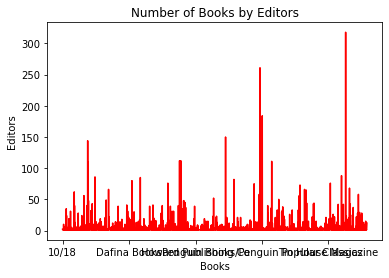

In [10]:
# Single line chart of books by editors

fig1 = bk_bp.plot(kind = 'line', color = 'r')
plt.title('Number of Books by Editors',color = 'black')
plt.xlabel('Books',color = 'black')
plt.ylabel('Editors',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('linechart_single.png')

plt.show()

In [11]:
#Vertical bar chart
plt.plot(df.loc['Books','year'], label = 'Books')
plt.legend(loc = 'lower right', fontsize = 12)
plt.xticks(rotation = 90, color = 'white', fontsize = 14, fontweight = 'bold')
plt.yticks(color = 'white', fontsize = 14, fontweight = 'bold')
plt.title('Books Published per Year',color = 'white', fontsize = 20, fontweight = 'bold')
plt.xlabel('year',color = 'black', fontsize = 16, fontweight = 'bold')
plt.ylabel('Number of Books',color = 'black',fontsize = 16, fontweight = 'bold')
plt.savefig('cyber_line.png')

# plt.show()


KeyError: 'Books'

With your dataframe set up, time to start creating visualizations!

In [ ]:
# Use your Python skills to create a visualization here.


In [ ]:
# Use your Python skills to create a visualization here.
